### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자!!
- 머신러닝 전체 과정을 정리해보자!!

### 머신러닝 과정
- 문제정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석
- 모델 선택 및 학습
- 예측 및 평가

#### 1.문제정의
- 생존자/사망자 예측
- kaggle 경진대회 높은 순위를 차지!!
- 머신러닝 과정 전체를 체험해보는 실습

### 2. 데이터 수집
- kaggle 사이트로부터 train,test,gender_submission 다운로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #matplolib기반으로 만든 사용하기 편한 도구

In [3]:
train = pd.read_csv('train.csv',index_col='PassengerId')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(891, 11)

In [5]:
test.shape

(418, 11)

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3.전처리
- 결측치

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


    #### Embarked 결측치 처리

In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#fillna() 결측치를 채워주는 함수
#S가 최빈값이라서 채워줌
train['Embarked']=train['Embarked'].fillna('S') 

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### fare 결측치 처리

In [13]:
# 데이터 결측치를 처리할 때는 항상 train데이터를 기준으로 채워준다.
# test데이터는 평가하는 데이터라 test데이터를 참조해서 결측치를 채우면 애매해질수있다.
# median() 중앙값을 구하는 함수
train['Fare'].median()

14.4542

In [14]:
test['Fare']=test['Fare'].fillna(train['Fare'].median())

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
# 결측치나 전처리를 처리 할 때는 train데이터를 중심으로 탐색하고 전처리를 해야 올바르게 
# 데이터를 뽑아낼 수 있다. 

#### Age 결측치 처리

In [17]:
#corr() 두 변수사이의 상관계수
#ex)키,몸무게=양의 상관관계 , 성적,게임시간 = 음의 상관관계
#범위 -1~1 
# -1과 1에 가까운 변수들이 유효하다.
train.corr() 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


-상관관계가 제일 있는 Pclass 컬럼을 활용하자
-시대상을 고려했을때 성별을 함께 고려하면 좋을 것 같다.

In [18]:
train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [19]:
#groupby- 데이터를 묶어서 보고싶을때 유용한 기능
#transform()변환하다 - 각각의 셈플마다 바로 적용해서 볼 수 있는 것
#Pclass와sex를 묶어 중앙값으로 변환해주겠다.
age_result = train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).transform('median')
age_result

,Age
PassengerId,
1,25.0
2,35.0
3,21.5
4,35.0
5,25.0
...,...
887,30.0
888,35.0
889,21.5


In [20]:
# 결측치
# train['Age']를 age_result['Age'] 의 값으로 채워주겠다.
train['Age'].fillna(age_result['Age'], inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
age_result2 = test[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).transform('median')
age_result2

,Age
0,24.0
1,22.0
2,28.0
3,24.0
4,22.0
...,...
413,24.0
414,41.0
415,24.0
416,24.0


In [23]:
test['Age'].fillna(age_result2['Age'], inplace=True)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Cabin 결측치 처리

In [25]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
train['Cabin'].fillna('M',inplace=True)

In [27]:
test['Cabin'].fillna('M',inplace=True)

In [28]:
#첫번째 문자만 꺼내주세요
train['Cabin']=train['Cabin'].str[0]

In [29]:
test['Cabin']=train['Cabin'].str[0]

In [30]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        417 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
# 결측치를 채워줘야 데이터를 탐색할때 여러가지 정보를 사용할 수 있다.

#### 4. 데이터 탐색(EDA)
- train를 데이터를 탐색
- test데이터는 평가를 위해서 탐색x
- 데이터가 넉넉하지 않으면 train과test를 같이 탐색해야함

#### 범주형 데이터

### Cabin시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

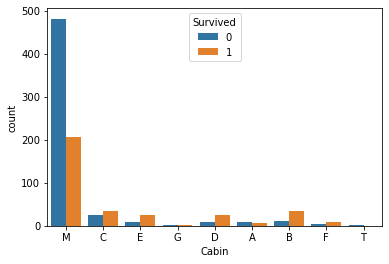

In [34]:
#data는 내가 넣을 데이터
# x속성을 이용하면 수직으로 올라가는 var차트를 그릴수있음 
#hue는 카운트할 컬럼이름
#각Cabin별로 산사람과 죽은 사람 보기
sns.countplot(data=train,x='Cabin',hue='Survived')
#데이트분석은 추측이고 추측을 기반으로 데이터 분석을 한다.
#해당분야에 지식이 많으면 도움이된다.

###

-M에서 상대적으로 사람이 많이 죽었다.
-생족여부 판단에 활용해도 괜찮지 않을까??

#### Pclass시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

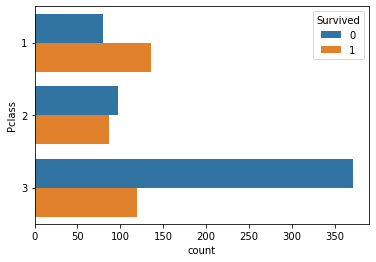

In [35]:
sns.countplot(data=train,y='Pclass',hue='Survived')

In [36]:
#3등급 사람들이 많이 사망했다.
#1등급 사람들이 비교적 많이 생존했다.

#### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

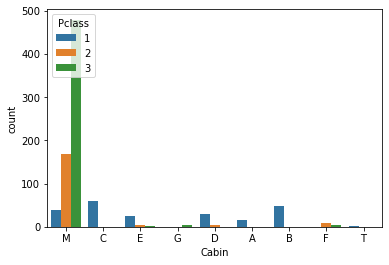

In [37]:
sns.countplot(data=train,x='Cabin',hue='Pclass')

#### Sex 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

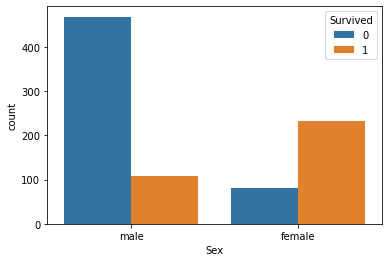

In [38]:
sns.countplot(data=train,x='Sex',hue='Survived')

In [39]:
# 남성이 상대적으로 많이 죽었고 여성이 많이 살았다.

#### Embarked 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

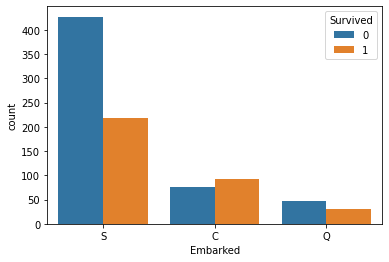

In [40]:
sns.countplot(data=train,x='Embarked',hue='Survived')

#### 수치형(연속형)데이터
- 수치형(연속형)데이터는 구간을 정해서 빈도를 센다
- 주로 히스토그램을 이용해 그림을 그린다.
- KDE(커널밀도함수그래프)

#### 나이 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

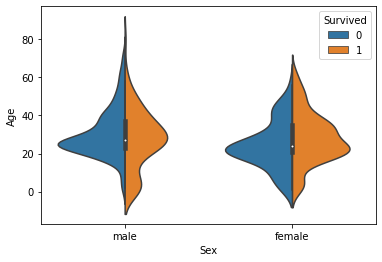

In [41]:
#split=True- 하나의 바이올린 형태로 그려줄려면 split=True로 해야한다.
sns.violinplot(data=train,
              x = 'Sex',
              y= 'Age',
              hue = 'Survived',
              split=True)

In [42]:
# 20~30대 중반 탐승객들이 많이 사망/생존
# 10살 미만 중에는 남자아잉가 여자아이보다 생존한 사람의 숫자 많다.

#### Fare시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

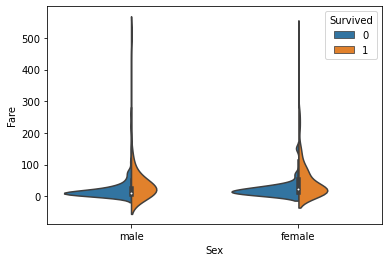

In [43]:
sns.violinplot(data=train,
              x = 'Sex',
              y= 'Fare',
              hue = 'Survived',
              split=True)

In [44]:
# 요금이 싼 사람이 비교적 많이 사망

#### Parch,Sibsp 시각화(부모자식,형재배우자)
- 특성공학 : 부모자식 + 형제배우자 + 1 = 가족

In [45]:
train['Family_size'] = train['Parch']+train['SibSp']+1
test['Family_size'] = test['Parch']+test['SibSp']+1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

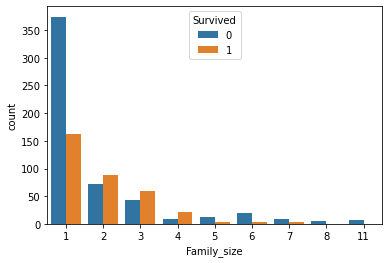

In [46]:
sns.countplot(data=train, x='Family_size', hue='Survived')

In [47]:
# 1명일때는 죽은 비율이 높고,2~4명일때는 산 비율이 높고, 5명 이상은 죽은 비율이 높다

In [48]:
bins = [0,1,4,20] #자르고자하는 구간 정보
labels = ['Alone','Small','Large'] #자른 구간의 이름
train['Family_group']=pd.cut(train['Family_size'],
                            bins = bins,
                            labels = labels)

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,Alone


In [50]:
test['Family_group']=pd.cut(test['Family_size'],
                            bins = bins,
                            labels = labels)

<AxesSubplot:xlabel='Family_group', ylabel='count'>

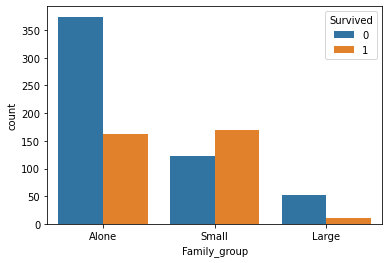

In [51]:
sns.countplot(data=train,x='Family_group',hue='Survived')

#텍스트 데이터
#비정형데이터 - 어떠한 정해진 틀로 정해지지 않고 여러가지 구조로 데이터가 나오는것
### Text데이터 다루기
    

### Name 시각화

In [52]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [63]:
def split_title(name):
    #코드
    return name.split(',')[1].split('.')[0].strip()

In [67]:
#apply함수는 각 행식 각 열마다 적용할 수 있게 도움을 준다.
train['Title']=train['Name'].apply(split_title)
test['Title']=test['Name'].apply(split_title)

In [66]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,Alone,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

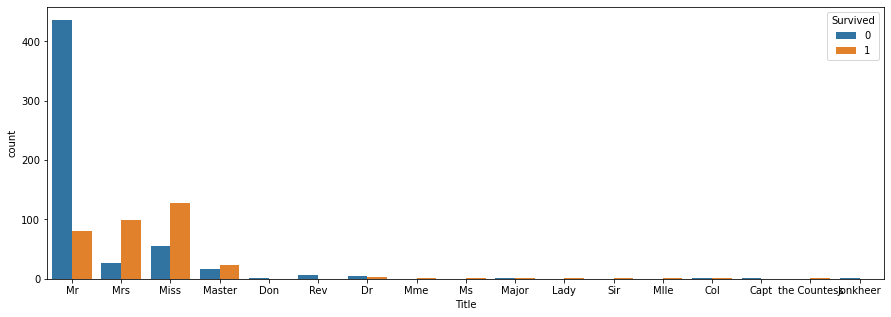

In [69]:
plt.figure(figsize=(15,5))#그림의 크기 결정(가로,세로)
sns.countplot(data=train,x='Title',hue='Survived')
#세세하게 그래프를 조정하고 싶다면 plt
#빠르게 내가 원하는 정보만 간결하게 보고싶다면 sns

<AxesSubplot:xlabel='Title', ylabel='count'>

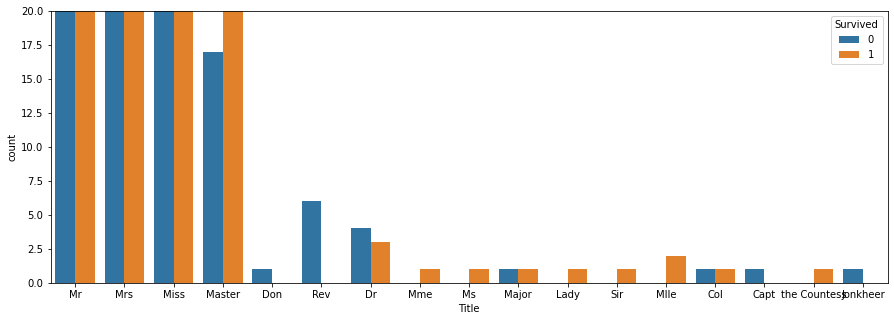

In [71]:
plt.figure(figsize=(15,5))#그림의 크기 결정(가로,세로)
plt.ylim(0,20)#y축을 0에서 20까지만 제한한다
sns.countplot(data=train,x='Title',hue='Survived')

- Mr,Mrs,Miss
- Master :결혼하지 않은 남성, 주로 청소년 이하
- Rev
- Other(나머지)

In [72]:
#map-a를 b라고 부른다.
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [77]:
conver_title_dic= {
   'Mr': 'Mr', 
    'Mrs': 'Mrs', 
    'Miss': 'Miss', 
    'Master':'Marster', 
    'Don':'Other', 
    'Rev' : 'Rev', 
    'Dr' : 'Other', 
    'Mme': 'Other', 
    'Ms': 'Other',
    'Major': 'Other', 
    'Lady': 'Other', 
    'Sir': 'Other', 
    'Mlle': 'Other', 
    'Col': 'Other', 
    'Capt': 'Other',
    'the Countess': 'Other',
    'Jonkheer': 'Other',
    'Dona': 'Other'
}

In [74]:
train['Title']=train['Title'].map(conver_title_dic)

In [75]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Marster', 'Other', 'Rev'], dtype=object)

In [76]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [78]:
test['Title']=test['Title'].map(conver_title_dic)

In [79]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Marster', 'Other', 'Rev'], dtype=object)

#### 티켓
- 버리자

In [81]:
train.drop('Ticket',axis=1,inplace=True)


KeyError: "['Ticket'] not found in axis"

In [82]:
test.drop('Ticket',axis=1,inplace=True)

In [83]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)